## In this notebook we study the following single species coagulation reaction with sopantaneous creation and destruction:

\begin{equation}
    A \leftrightharpoons_{k_2}^{k_1} \emptyset    
\end{equation}

\begin{equation}
    A + A\rightarrow^{k_3} A    
\end{equation}

## Starting from Poisson initial conditions. 

## We numerically solve the Chemical Master Equation by bouding the state space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import emre


## Setting up the reaction stoichiometry, rates and initial conditions

In [2]:
# Setting up the reactions and the parameters:

#Number of species in the reaction system
num_species     = 1 

#Number of interating reactions in the Hamiltonian
num_interaction = 1 

#This counts the total number of possible reactions in the system.
#We have 2N creation and destruction reactions and the rest interaction reactions
num_reactions   = 2*num_species + num_interaction 

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([1.]) #len must be equal to num_species
k2 = np.array([1.]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.]) #len must be equal to num_interactions    

#Defining the stoichiometry for the reactions
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [1] 
r_i[0] = [2]

rxn_par = [k1,k2,k3]

#The initial mean concentration of the species
initial_values = 4./3.


### Define simulation times

In [8]:
tstart = 0.
tfinal = 2.
tstep = 0.002

### Define the EMRE class using this data

In [9]:
system = emre.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)

In [28]:
emre.initialize_dynamics(system,initial_values,tstart,tfinal,tstep,measureResponse=True,volume=1.)
emre.runDynamics(system)

999it [00:08, 119.27it/s]                                                                                                                                        


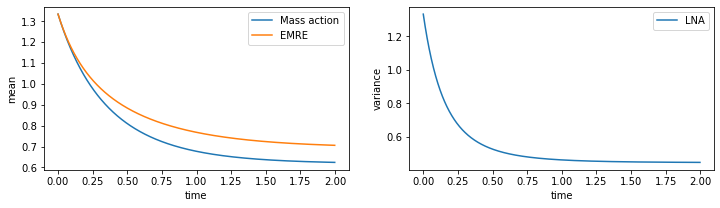

In [29]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(system.timeGrid,system.y[0],label='Mass action')
plt.plot(system.timeGrid,system.y[0]+system.eps[0],label='EMRE')
plt.xlabel('time')
plt.ylabel('mean')
plt.legend()

plt.subplot(122)
plt.plot(system.timeGrid,system.lna_var[0,0],label='LNA')
plt.xlabel('time')
plt.ylabel('variance')
plt.legend()

In [ ]:
plt.pcolor(system.timeGrid,system.timeGrid,system.resp[0,0])
plt.title(r'$ R(t,t^\prime)$')
plt.ylabel(r'$t$')
plt.xlabel(r'$t^\prime$')
plt.colorbar()